## Preprocessing

In [35]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [36]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [37]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
app_cat = application_df.dtypes.index.tolist()
application_df[app_cat].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [38]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
app_type_count = application_df['APPLICATION_TYPE'].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [39]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace = list(app_type_count[app_type_count < 600].index)


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [40]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
class_count = application_df['CLASSIFICATION'].value_counts()
class_count.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [41]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
class_count = application_df['CLASSIFICATION'].value_counts()
class_count_filtered = class_count[class_count > 1]
print(class_count_filtered.head(20))

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64


In [42]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = list(class_count[class_count < 300].index)


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [43]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
numeric_app_df = pd.get_dummies(application_df)
numeric_app_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = numeric_app_df["IS_SUCCESSFUL"]
X = numeric_app_df.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [45]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [46]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 9)                 396       
                                                                 
 dense_12 (Dense)            (None, 18)                180       
                                                                 
 dense_13 (Dense)            (None, 1)                 19        
                                                                 
Total params: 595
Trainable params: 595
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [48]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)


Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5976 - accuracy: 0.7048
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5617 - accuracy: 0.7256
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5574 - accuracy: 0.7283
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5553 - accuracy: 0.7297
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5533 - accuracy: 0.7303
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5524 - accuracy: 0.7304
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5517 - accuracy: 0.7299
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5510 - accuracy: 0.7299
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5507 - accuracy: 0.7318
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5501 - accura

In [49]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5546 - accuracy: 0.7256 - 591ms/epoch - 2ms/step
Loss: 0.5545729398727417, Accuracy: 0.7255976796150208


<AxesSubplot: >

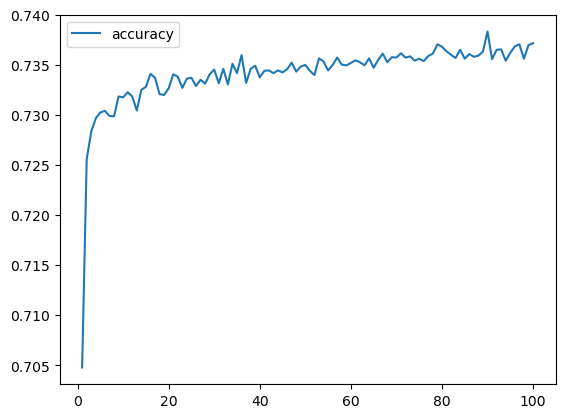

In [50]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [51]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE

nn.save('Models/TrainedCharityData.h5')

# Optimise 2

In [52]:
#Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 27

# nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 9)                 396       
                                                                 
 dense_12 (Dense)            (None, 18)                180       
                                                                 
 dense_13 (Dense)            (None, 1)                 19        
                                                                 
 dense_14 (Dense)            (None, 9)                 18        


                                                                 
 dense_15 (Dense)            (None, 18)                180       
                                                                 
 dense_16 (Dense)            (None, 27)                513       
                                                                 
 dense_17 (Dense)            (None, 1)                 28        
                                                                 
Total params: 1,334
Trainable params: 1,334
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
y_test = np.array(y_test)
y_train = np.array(y_train)

In [55]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100


804/804 [==============================] - 3s 2ms/step - loss: 0.5725 - accuracy: 0.7173
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5481 - accuracy: 0.7343
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5459 - accuracy: 0.7355
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5458 - accuracy: 0.7336
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5448 - accuracy: 0.7363
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5452 - accuracy: 0.7361
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5450 - accuracy: 0.7354
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5441 - accuracy: 0.7357
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5444 - accuracy: 0.7354
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5446 - accuracy: 0.7359
E

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5545 - accuracy: 0.7258 - 641ms/epoch - 2ms/step
Loss: 0.554462730884552, Accuracy: 0.7258309125900269


<AxesSubplot: >

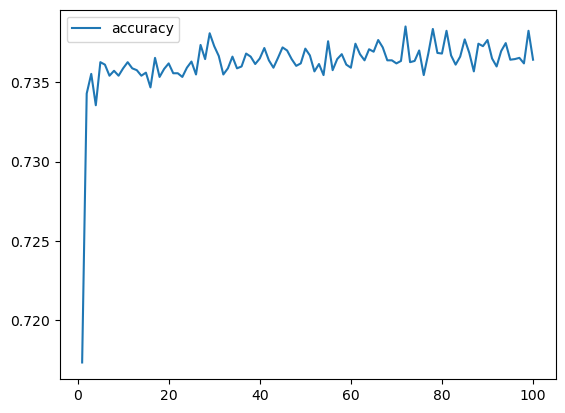

In [57]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [58]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity_v2.h5')

# Optimise 3

In [59]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 27

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 9)                 396       
                                                                 
 dense_19 (Dense)            (None, 18)                180       
                                                                 
 dense_20 (Dense)            (None, 27)                513       
                                                                 
 dense_21 (Dense)            (None, 1)                 28        
                                                                 
Total params: 1,117
Trainable params: 1,117
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [61]:
y_test = np.array(y_test)
y_train = np.array(y_train)

In [62]:
# Train Data
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5837 - accuracy: 0.7123
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5601 - accuracy: 0.7284
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5569 - accuracy: 0.7289
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5543 - accuracy: 0.7318
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5529 - accuracy: 0.7306
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5519 - accuracy: 0.7319
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5510 - accuracy: 0.7313
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5502 - accuracy: 0.7321
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.7304
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5494 - accura

In [63]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5525 - accuracy: 0.7243 - 616ms/epoch - 2ms/step
Loss: 0.552543580532074, Accuracy: 0.7243148684501648


<AxesSubplot: >

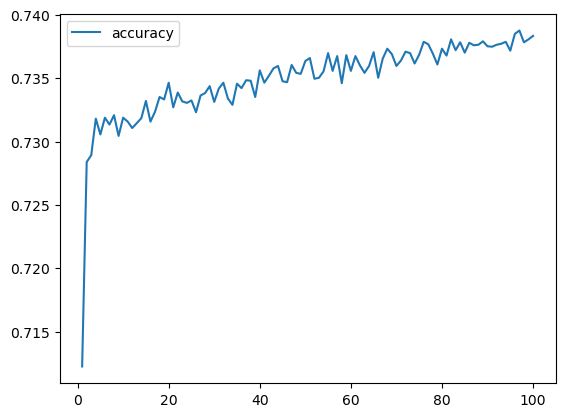

In [64]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [65]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity_v3.h5')